<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/test_sktime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Time Series Classification, Regression, Clustering & More](https://www.sktime.net/en/stable/examples/02_classification.html)

In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 6.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sktime.datasets import load_italy_power_demand
# load an example time series panel in pd-multiindex mtype
X, _ = load_italy_power_demand(return_type="pd-multiindex")

# renaming columns for illustrative purposes
X.columns = ["total_power_demand"]
X.index.names = ["day_ID", "hour_of_day"]

In [4]:
X

total_power_demand
day_ID hour_of_day                    
0      0                     -0.710518
       1                     -1.183320
       2                     -1.372442
       3                     -1.593083
       4                     -1.467002
...                                ...
1095   19                     0.180490
       20                    -0.094058
       21                     0.729587
       22                     0.210995
       23                    -0.002542

[26304 rows x 1 columns]

In [5]:
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy3D")
X_new, _ = load_italy_power_demand(split="test", return_type="numpy3D")

In [6]:
X_train.shape

(67, 1, 24)

In [7]:
# y is a 1D np.ndarray of labels - same length as number of instances in X_train
y_train.shape

(67,)

In [8]:
# step 3 - specify the classifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

# example 1 - 3-NN with simple dynamic time warping distance (requires numba)
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3)

# example 2 - custom distance:
# 3-nearest neighbour classifier with Euclidean distance (on flattened time series)
# (requires scipy)
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import FlatDist, ScipyDist

eucl_dist = FlatDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=eucl_dist)

In [9]:
# all classifiers is scikit-learn / scikit-base compatible!
# nested parameter interface via get_params, set_params
clf.get_params()

{'algorithm': 'brute',
 'distance': FlatDist(transformer=ScipyDist()),
 'distance_mtype': None,
 'distance_params': None,
 'leaf_size': 30,
 'n_jobs': None,
 'n_neighbors': 3,
 'pass_train_distances': False,
 'weights': 'uniform',
 'distance__transformer': ScipyDist(),
 'distance__transformer__colalign': 'intersect',
 'distance__transformer__metric': 'euclidean',
 'distance__transformer__metric_kwargs': None,
 'distance__transformer__p': 2,
 'distance__transformer__var_weights': None}

In [10]:
# step 4 - fit/train the classifier
clf.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance=FlatDist(transformer=ScipyDist()),
                               n_neighbors=3)

In [11]:
# the classifier is now fitted
clf.is_fitted

True

In [12]:
# and we can inspect fitted parameters if we like
clf.get_fitted_params()

{'classes': array(['1', '2'], dtype='<U1'),
 'fit_time': 4,
 'knn_estimator': KNeighborsClassifier(algorithm='brute', metric='precomputed', n_neighbors=3),
 'n_classes': 2,
 'n_vars': 1,
 'knn_estimator__classes': array(['1', '2'], dtype='<U1'),
 'knn_estimator__effective_metric': 'precomputed',
 'knn_estimator__effective_metric_params': {},
 'knn_estimator__n_features_in': 67,
 'knn_estimator__n_samples_fit': 67,
 'knn_estimator__outputs_2d': False}

In [13]:
# step 5 - predict labels on new data
y_pred = clf.predict(X_new)

In [14]:
# y_pred is an 1D np.ndarray, similar to sklearn classification output
y_pred

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U1')

In [15]:
# predictions and unique counts, for illustration
unique, counts = np.unique(y_pred, return_counts=True)
unique, counts

(array(['1', '2'], dtype='<U1'), array([510, 519]))

## Below  that's all !!

In [16]:
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy3D")
X_new, _ = load_italy_power_demand(split="test", return_type="numpy3D")

# step 3 - specify the classifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import FlatDist, ScipyDist

eucl_dist = FlatDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=eucl_dist)

# step 4 - fit/train the classifier
clf.fit(X_train, y_train)

# step 5 - predict labels on new data
y_pred = clf.predict(X_new)

In [17]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datasets import load_italy_power_demand

# data should be split into train/test
X_train, y_train = load_italy_power_demand(split="train", return_type="numpy3D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy3D")

# step 3-5 are the same
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import FlatDist, ScipyDist

eucl_dist = FlatDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=eucl_dist)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# for simplest evaluation, compare ground truth to predictions
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.956268221574344

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=None))

Confusion Matrix
[[489  24]
 [ 21 495]]
Classification Report
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       513
           2       0.95      0.96      0.96       516

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



### 参考
[Python ライブラリー「sktime」で学ぶらくらくビジネス時系列機械学習 Web講座– 第8回：時系列分類 –](https://www.salesanalytics.co.jp/software/sktime/sktime008/)

In [45]:
from sktime.datasets import load_italy_power_demand
X, y = load_italy_power_demand(return_type='nested_univ')

In [32]:
X

,dim_0
0,0 -0.710518 1 -1.183320 2 -1.372442 3...
1,0 -0.993009 1 -1.426786 2 -1.579884 3...
2,0 1.319067 1 0.569774 2 0.195128 3...
3,0 -0.812444 1 -1.157553 2 -1.416385 3...
4,0 -0.972840 1 -1.390518 2 -1.536705 3...
...,...
1091,0 0.431025 1 -0.518479 2 -1.118165 3...
1092,0 -0.612215 1 -1.049884 2 -1.362505 3...
1093,0 -1.262706 1 -1.449774 2 -1.519924 3...
1094,0 0.714321 1 0.629029 2 0.117277 3...


In [33]:
from sktime import datatypes
datatypes.mtype(X)

TypeError: Error in check_is_mtype, more than one mtype identified: ['nested_univ', 'pd_DataFrame_Table']

In [34]:
X.loc[5,:].values

array([0     0.367424
       1    -0.277808
       2    -0.761732
       3    -0.869271
       4    -1.138118
       5    -1.084348
       6    -1.138118
       7    -0.600424
       8    -1.084348
       9    -0.277808
       10    0.367424
       11    0.474963
       12    0.528732
       13    0.098577
       14   -0.277808
       15   -0.385347
       16   -0.600424
       17   -0.546655
       18   -0.492886
       19    0.367424
       20    2.303120
       21    2.088043
       22    1.765427
       23    1.173964
       dtype: float64], dtype=object)

In [35]:
y

array(['1', '1', '2', ..., '2', '2', '2'], dtype='<U1')

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6)

In [37]:
X_train

,dim_0
443,0 -1.051736 1 -1.340542 2 -1.552334 3...
835,0 -0.870029 1 -1.186004 2 -1.607305 3...
423,0 -1.047165 1 -1.383842 2 -1.562083 3...
327,0 -0.007175 1 -0.523753 2 -1.083379 3...
640,0 -1.011435 1 -1.332575 2 -1.540371 3...
...,...
792,0 -0.988884 1 -1.295120 2 -1.579481 3...
164,0 -1.130854 1 -1.404787 2 -1.446931 3...
991,0 -0.991647 1 -1.259289 2 -1.465168 3...
637,0 -0.901723 1 -1.202895 2 -1.504067 3...


In [47]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
classifier

KNeighborsTimeSeriesClassifier(distance='euclidean')

In [48]:
classifier.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance='euclidean')

In [49]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

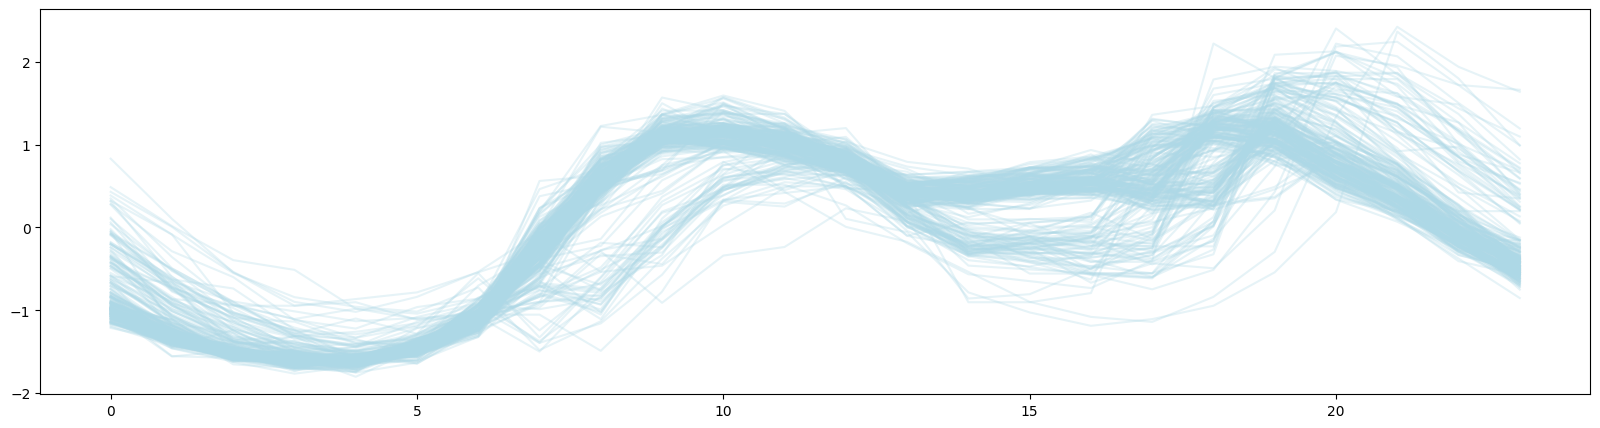

In [50]:
d = X_test.loc[y_test_pred=='1',:].copy()
plt.figure(figsize=(20,5))
for i in d.index:
    plt.plot(d.loc[i,:].values[0], c='lightblue', alpha=0.3)

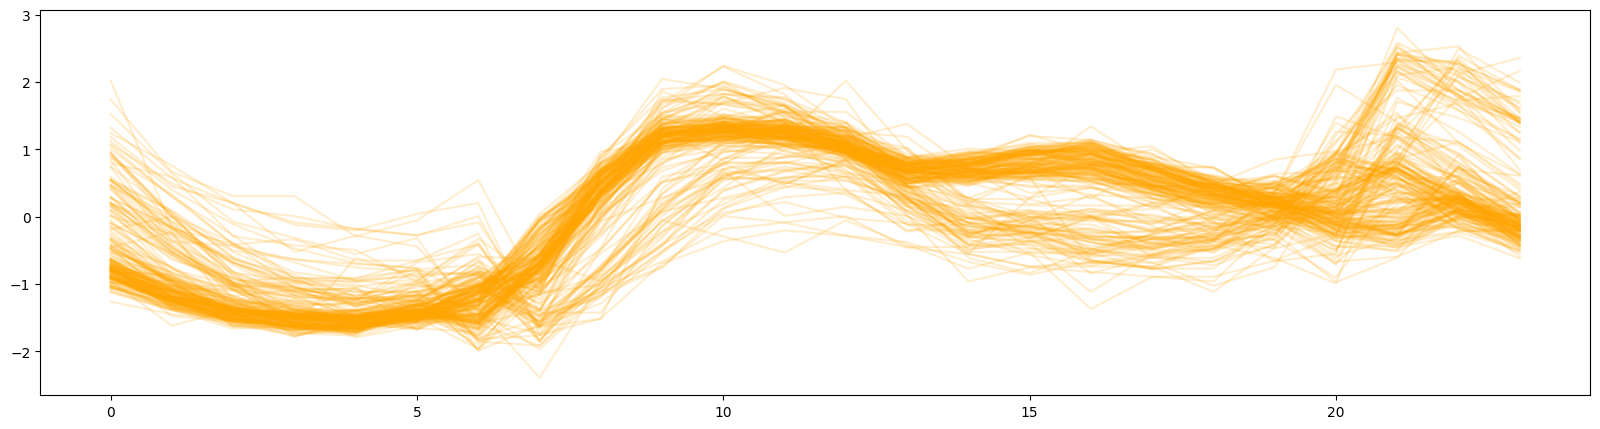

In [51]:
d = X_test.loc[y_test_pred=='2',:].copy()
plt.figure(figsize=(20,5))
for i in d.index:
    plt.plot(d.loc[i,:].values[0],c='orange',alpha=0.2)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[222,   4],
       [  9, 204]])

In [53]:
from sklearn.metrics import f1_score
f1_score(y_true=(y_test=='1'),y_pred=(y_test_pred=='1'))

0.9715536105032823

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_test_pred))
print('Classification Report')
print(classification_report(y_test, y_test_pred, target_names=None))

Confusion Matrix
[[222   4]
 [  9 204]]
Classification Report
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       226
           2       0.98      0.96      0.97       213

    accuracy                           0.97       439
   macro avg       0.97      0.97      0.97       439
weighted avg       0.97      0.97      0.97       439

